# Categorical Variable - exploratory analysis
In this post we are going to focus on EDA techniques for categorical variables which includes ordinal, dichotomous and nominal variables. You can find details of types of variable here (https://statistics.laerd.com/statistical-guides/types-of-variable.php).
EDA can be graphical or quantitative depending on what are we trying to find. Following previous analogy of patient, reports like x-ray, MRI, scans, can be seen as graphical method which provides overall picture of data and involves qualitative analysis. Whereas blood reports, dimensions of tumour can be understood as quantitative method which are objective.
In general data is constitute of several columns and rows. Now one can choose to explore one variable at a time (uni+variate=univariate), two variables at a time (bi+variate=bivariate), or multiple variables at same time (multi+variate= multivariate).

In [168]:
#importing libraries
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

#This data is a reservation data of restaurant which consists of details like gender, day, meal time, number of customers, total bill paid and the tip.

In [169]:
tp=pd.read_csv("tips.csv") #Loading the reservation file 

In [25]:
tp.head() #Quick view of data
#print('Total number of rows:',tp.shape[1]) 
#7 columns, 
#print('Total number of columns:', tp.shape[0])
#244 rows

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


# Univariate-Quantitative EDA
The most useful information that can be extracted from this analysis in context to the categorical variable, is to know the categories, frequency of occurrence, proportion or percentage of data falls under each category. Frequency tables are the most popular way of doing this analysis.

If we want to know how many males and females dined? we can easily find that out using frequency tables.
The below frequency table shows that, there were more males (roughly 65%) than female(approx 35%). 

In [35]:
#Frequency table for Variable 'sex'
g_tab=pd.crosstab(index=tp['sex'],columns=('Frequency'))
#g_tab=pd.crosstab(index=tp['sex'],columns=('Frequency'),margins=True)#shows the total row wise and column wise
g_tab

col_0,Frequency
sex,
Female,87
Male,157


We can quickly check proportion/percent events of a particular category from the complete dataset. 

In [37]:
g_tab=pd.crosstab(index=tp['sex'],columns=('Frequency')) #Create frequency table for variable sex
g_tab['percentage']=g_tab['Frequency']*100/g_tab['Frequency'].sum()#Create column percentage and calculate the percentage
g_tab['proportion']=g_tab['Frequency']/g_tab['Frequency'].sum()#Create column proportion and calculate the proportion
g_tab

col_0,Frequency,percentage,proportion
sex,,,
Female,87,35.655738,0.356557
Male,157,64.344262,0.643443


Similar to crosstab function, we can also find the count of a category by using count function, which means if we want to quickly check the count we can use the count function. However, because cross_tab function returns a dataframe, we can perform the dataframe functions on the results.

In [19]:
tp.sex.value_counts()

Male      157
Female     87
Name: sex, dtype: int64

Let's find out more about the data. Below data shows that out of all the reservations 93 people were smoker. Similar to g_tab, here as well we can find percentage of smokers (38%).

In [43]:
s_tab=pd.crosstab(index=tp['smoker'],columns=('Frequency'),margins=True)
s_tab

col_0,Frequency,All
smoker,,
No,151,151
Yes,93,93
All,244,244


Now what if we are interested in knowing during which meal the restaurants gets more customer. We can do that by 
taking look at frequency of dinner and lunch reservation. From the below query, it is clear that the restaurant is more busy during the dinner time than the lunch time. With this simple analysis, owner can choose between trying to get more customer during lunch or can improve the revenue generated during the dinner hours.

In [39]:
t_tab=pd.crosstab(index=tp['time'],columns=('Frequency'))
t_tab

col_0,Frequency
time,
Dinner,176
Lunch,68


In addition to the above analysis, lets find out on what days the restaurant is getting more customers. 
We can see from the below code that Saturdays and sundays the restaurant gets most of the customers. The customer 
reservation is drastically low on fridays as compared to Thursday, Sat, sunday.
With this frequency table, we identified that that fridays restaurant is getting less customers and this can be point of further investigation. It would be interesting to see cross tabulation of day and time (meal time), which is covered in Multivariate-Quantitaive EDA section. 

In [44]:
d_tab=pd.crosstab(index=tp['day'],columns=('Frequency'))
d_tab['percentage']=d_tab['Frequency']*100/d_tab['Frequency'].sum()#Create column percentage and calculate the percentage
d_tab


col_0,Frequency,percentage
day,,
Fri,19,7.786885
Sat,87,35.655738
Sun,76,31.147541
Thur,62,25.409836


# Univariate-Graphical EDA
When we think graphs, bar plots are one of the most widely used graphs. A similar information from frequency tabulation can also be attained in form of bar plots, which are more useful in presenting the analysis. Having able to present the information in visual form is one of the key element in effectively presenting the analysis.

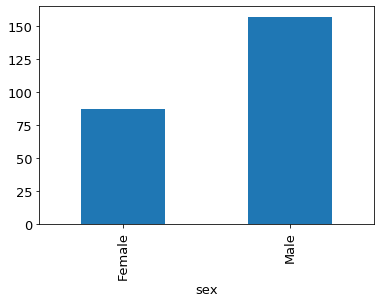

In [97]:
g_tab['Frequency'].plot(kind='bar')

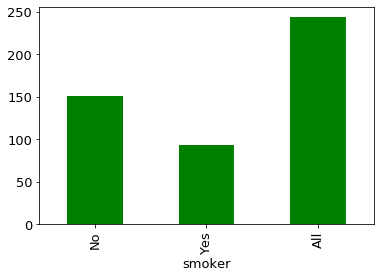

In [98]:
s_tab['Frequency'].plot(kind='bar',color='green')


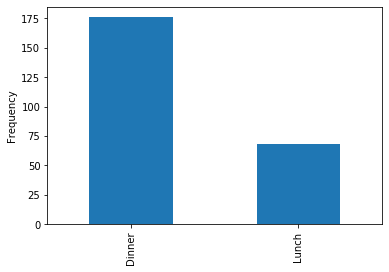

In [56]:
%matplotlib inline
tp['time'].value_counts().plot(kind='bar')

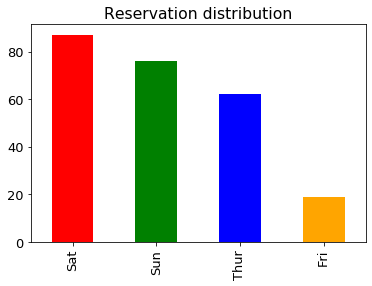

In [99]:
tp['day'].value_counts().plot(kind='bar',color=(['red','green','blue','orange']),title="Reservation distribution")

# Multivariate-Quantitative EDA
Cross tabulation: Cross-tabulation is the basic bivariate non-graphical EDA technique. However, it is not limited to the bivariate, but can be extended further. Reason why more than 5-way cross tables are not very popular is because it becomes a little hard to apprehend as the cross tabulation grows.


As mentioned earlier, it would be interesting to see what days are more popular for dinner or lunch. This can be done by plotting frequency cross tabulation.

In [102]:
dt_tab=pd.crosstab(index=tp['day'],columns=tp['time'],margins=True)
dt_tab

time,Dinner,Lunch,All
day,,,
Fri,12,7,19
Sat,87,0,87
Sun,76,0,76
Thur,1,61,62
All,176,68,244


We already know that restaurant is more busy/popular for the dinner than lunch and the above table also confirms the same. What is interesting to notice is that contrary to all days, Thursday is the only day when there are more reservations of lunch. And dinner reservation is drastically low.
This anamoly raises suspicion. Either this can be a genuine case or it can be entry mistake. In both scenario further investigation is required.

It is important to notice the flow of the analysis. First we analysed the variables individually and looked for anamoly. Once anamoly is identified, to gather more information we analysed multiple variables same time.

In [100]:
gd_tab=pd.crosstab(index=tp['day'],columns=tp['sex'],margins='True')
gd_tab

sex,Female,Male,All
day,,,
Fri,9,10,19
Sat,28,59,87
Sun,18,58,76
Thur,32,30,62
All,87,157,244


In [105]:
gt_tab=pd.crosstab(index=tp['time'],columns=tp['sex'],margins='True')
gt_tab

sex,Female,Male,All
time,,,
Dinner,52,124,176
Lunch,35,33,68
All,87,157,244


Similar to univariate & bivariate, we can also create cross table for multivariate and an example is given below.

In [108]:
xt_tab=pd.crosstab(index=tp['day'],columns=[tp['time'],tp['sex']],margins='True')
xt_tab

time Dinner       Lunch       All
sex  Female Male Female Male     
day                              
Fri       5    7      4    3   19
Sat      28   59      0    0   87
Sun      18   58      0    0   76
Thur      1    0     31   30   62
All      52  124     35   33  244

Univariate statistics per category: In case we have one categorical input variable and one quantitative outcome variable, generally the outcome variable statistics are calculated for each category and after that compare the statistics across the categories. The comparison is done using statistical tests such as anova.

In [171]:
#Anova test
stats.f_oneway(x1['day'],tp['tip'])

F_onewayResult(statistic=70.94281331077886, pvalue=4.174352735188285e-16)

# Multivariate-graphical EDA:
Side-by-Side Box-plots: In case we want to explore categorical input variable and quantitative output variable, the approach is to separate all the cases based on categories and then make box plots of output variable. Side by side box-plots are useful in investigating the relationship between categorical and quantitative variable. In addition to it, distribution of outcome variable can also be seen at each categorical variable level.

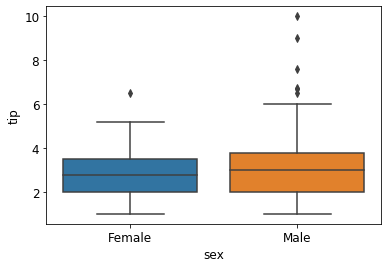

In [156]:
sns.boxplot(x=tp['sex'], y=tp['tip'], data=tp)

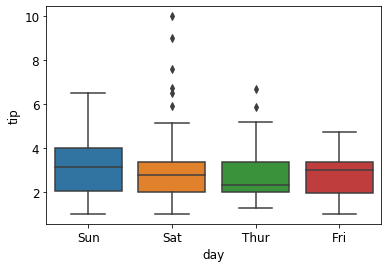

In [163]:
ax=sns.boxplot(x=tp['day'], y=tp['tip'], data=tp)
#ax = sns.swarmplot(x=tp['day'], y=tp['tip'], data=tp, color="grey")


In above box plots IQR for Thur, Fri, Sat are approximatelly same. In addition to that, saturday shows quite some outliers. 

In [167]:
tp.loc[(tp['day']=='Sat') & ((tp['sex']=='Female'))].mean()

total_bill    19.680357
tip            2.801786
size           2.250000
dtype: float64

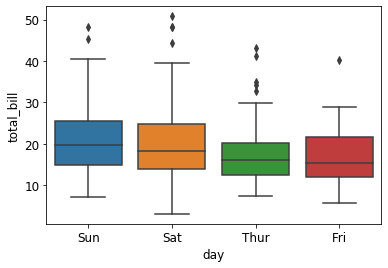

In [160]:
sns.boxplot(x=tp['day'], y=tp['total_bill'], data=tp)

EDA can bring enough understanding and knowledge to make aware decisions. However, one should not mistake EDA as an initial phase or one step process. As we progress with the data science cycle, one might need to do some EDA again after obtaining the results to analyse why the model is behaving in certain way or why a certain kind of output is seen. It wouldn't be wrong to see EDA as process than as a phase.